# Edunet Foundation 

In [1]:
ANN : 
    1. Input Layer 
    2. Hidden Layer 
    3. Output Layer 
    


SyntaxError: invalid syntax (4085867505.py, line 1)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Data/breast-cancer-wisconsin.csv")

In [5]:
df.info()
# checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.loc[df['diagnosis']=='M', 'benign_0__mal_1'] = 1
df.loc[df['diagnosis']=='B', 'benign_0__mal_1'] = 0
df.drop(columns='diagnosis',inplace=True)

In [7]:
df = df.drop(columns = ['id','Unnamed: 32'])

In [8]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


In [9]:
df.describe().transpose()
# check the statistical distributions of features and labels

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

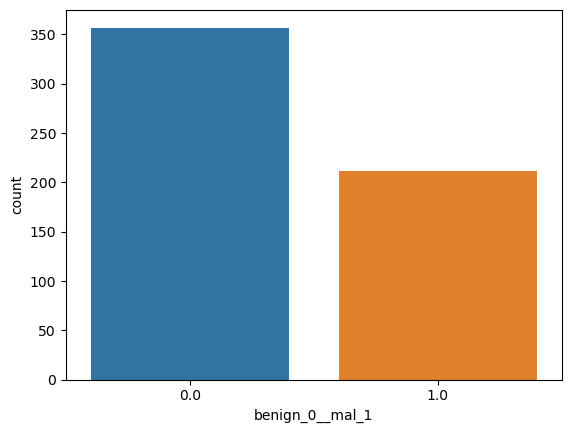

In [10]:
sns.countplot(x='benign_0__mal_1', data=df)

In [11]:
df.corr()['benign_0__mal_1'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

<Axes: >

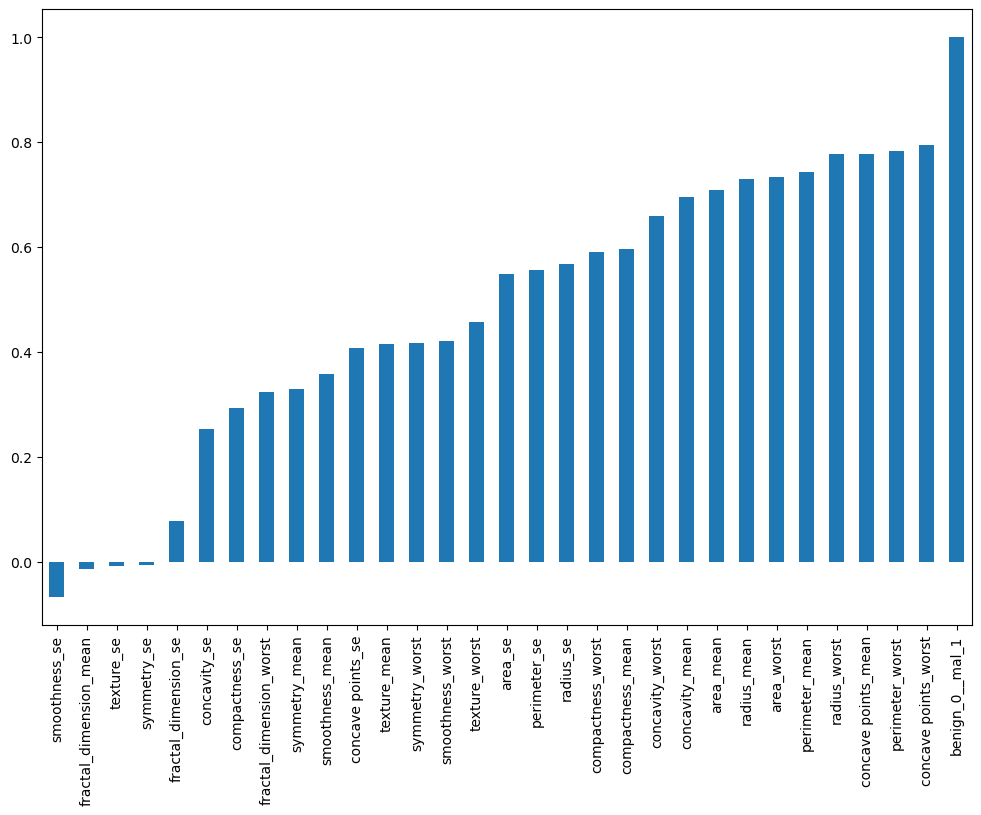

In [12]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

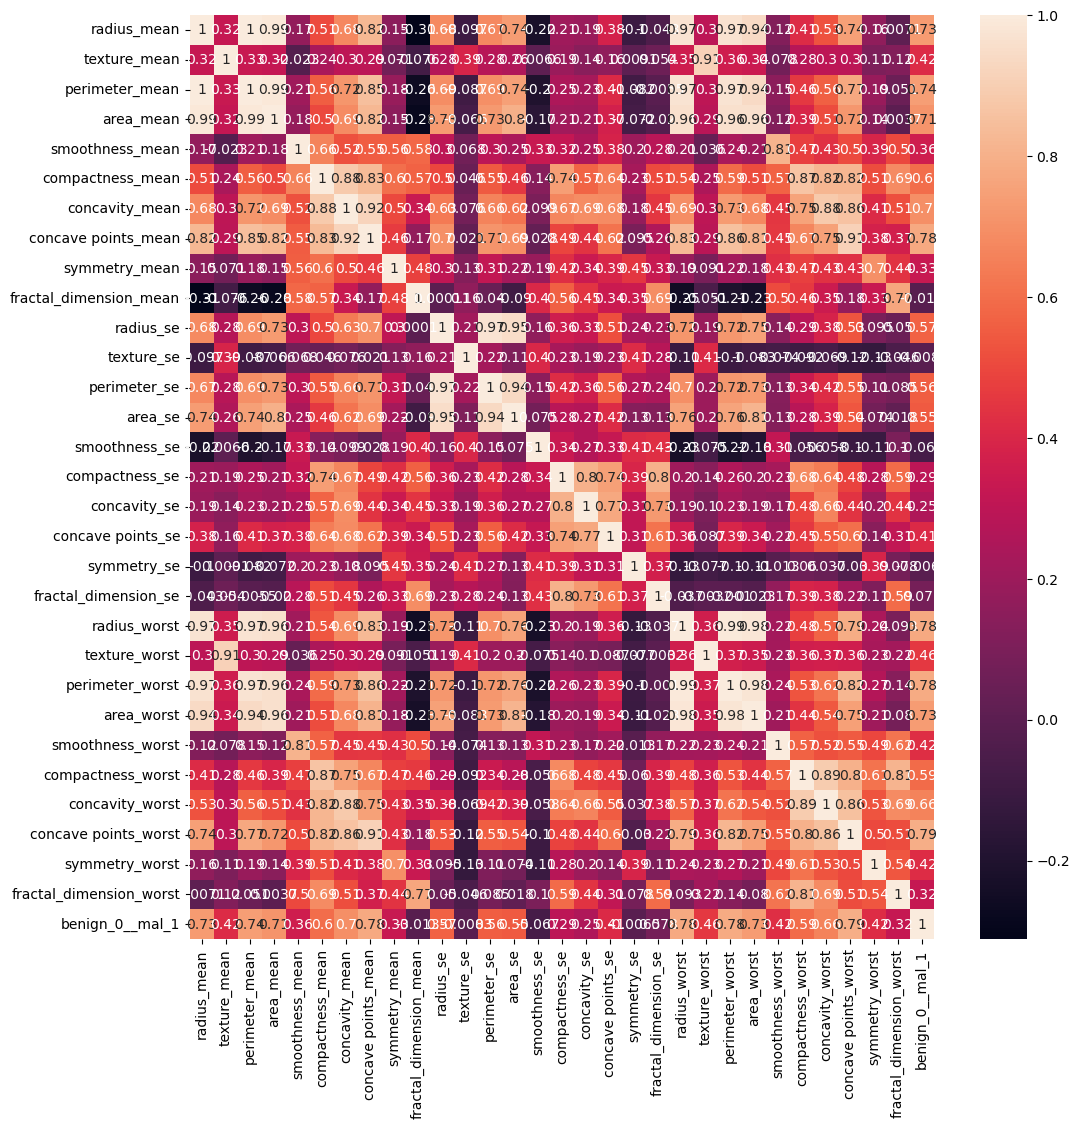

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [14]:
# Train Test Split

X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [18]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
# Creating the model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [25]:
model = Sequential() # model creation. 

#input layer 
model.add(Dense(30,activation='relu'))
# hidden layer 
model.add(Dense(15,activation='relu'))

#output layer 
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
14/14 [==============================] - 1s 17ms/step - loss: 0.6916 - accuracy: 0.6408 - val_loss: 0.6665 - val_accuracy: 0.7413
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6403 - accuracy: 0.8357 - val_loss: 0.6199 - val_accuracy: 0.8811
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5849 - accuracy: 0.8920 - val_loss: 0.5594 - val_accuracy: 0.8951
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5193 - accuracy: 0.8897 - val_loss: 0.4879 - val_accuracy: 0.8951
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4452 - accuracy: 0.8944 - val_loss: 0.4138 - val_accuracy: 0.9091
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3862 - accuracy: 0.8897 - val_loss: 0.3567 - val_accuracy: 0.9161
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3370 - accuracy: 0.9014 - val_loss: 0.3113 - val_accuracy: 0.9091
Epoch 8/100


Epoch 59/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9836 - val_loss: 0.1088 - val_accuracy: 0.9790
Epoch 60/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.9836 - val_loss: 0.1179 - val_accuracy: 0.9720
Epoch 61/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.9789 - val_loss: 0.1091 - val_accuracy: 0.9790
Epoch 62/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9836 - val_loss: 0.1132 - val_accuracy: 0.9720
Epoch 63/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9836 - val_loss: 0.1135 - val_accuracy: 0.9720
Epoch 64/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9836 - val_loss: 0.1090 - val_accuracy: 0.9790
Epoch 65/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9812 - val_loss: 0.1141 - val_accuracy: 0.9720
Epoch 

In [28]:
model_loss = pd.DataFrame(model.history.history)

In [29]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.691559,0.640845,0.666459,0.741259
1,0.640287,0.835681,0.619931,0.881119
2,0.584923,0.892019,0.559417,0.895105
3,0.519305,0.889671,0.487929,0.895105
4,0.445234,0.894366,0.413817,0.909091


<Axes: >

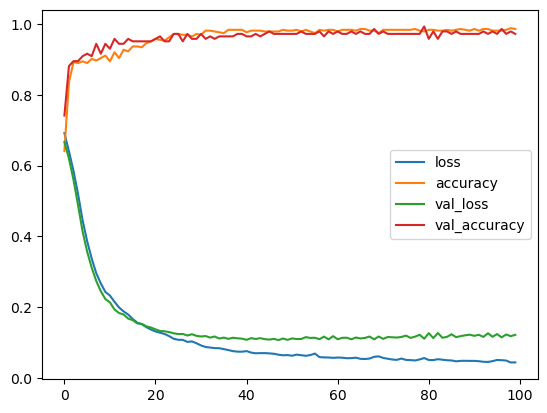

In [30]:
model_loss.plot()

In [31]:
# Early Stopping

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6675 - val_loss: 0.6500
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6329 - val_loss: 0.6157
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5969 - val_loss: 0.5782
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5606 - val_loss: 0.5397
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5214 - val_loss: 0.4915
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4728 - val_loss: 0.4421
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4297 - val_loss: 0.3909
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3842 - val_loss: 0.3481
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3444 - val_loss: 0.3121
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3114 - val_loss: 0.2846
Epoch 11

<Axes: >

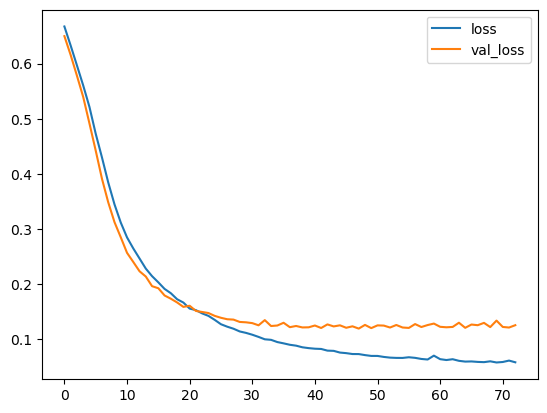

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
# Adding Dropout Layers

from tensorflow.keras.layers import Dropout

In [37]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7187 - val_loss: 0.6743
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6954 - val_loss: 0.6667
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6705 - val_loss: 0.6584
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6608 - val_loss: 0.6456
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6514 - val_loss: 0.6280
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6215 - val_loss: 0.5977
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6013 - val_loss: 0.5514
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5823 - val_loss: 0.5076
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5547 - val_loss: 0.4680
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5138 - val_loss: 0.4346
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1233 - val_loss: 0.0910
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1280 - val_loss: 0.0913
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1025 - val_loss: 0.1021
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1236 - val_loss: 0.1070
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1013 - val_loss: 0.0974
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1059 - val_loss: 0.0985
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1264 - val_loss: 0.1064
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1303 - val_loss: 0.0893
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1202 - val_loss: 0.0966
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1260 - val_loss: 0.1014
Epoch 93/600


In [39]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

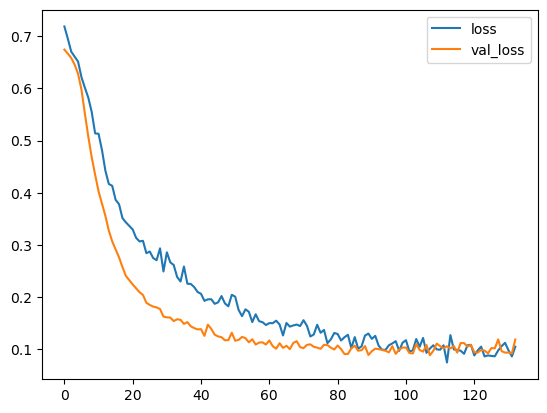

In [40]:
model_loss.plot()

In [41]:
# Model Evaluation
predictions = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [47]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.1189


0.11892512440681458

In [49]:
test_acc = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.1189


In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size=100, nb_epoch=150)

In [50]:
test_acc

0.11892512440681458